<a href="https://colab.research.google.com/github/davidmuna/FIFA-Supervised-Learning-Model/blob/master/Core_Supervised_learning_week_6_project_David_Muna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning with Exploratory Data Analysis -Core Week 6

## 1. Defining the Question

### a) Specifying the Question

I have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly and include rank in my training.

### b) Defining the Metric for Success

*   To create a model using Polynomial Regression and predict how many    goals the home team and away team scores 
*   To create a model using Logistic Regression and predict whether the home team will win, draw or lose
*   To obtain a low RMSE(<10% of mean of predicted feature) and high Accuracy(>90%) Score of the Polynomial and Logistic Regression Models respectively




### c) Understanding the context 
A new model of ranking FIFA/Coca-Cola World Cup games and other tournaments took effect in August 2018 after approval by the FIFA Council.It was named "SUM" as it relies on the difference of points won or lost for a game to/from the previous point totals rather than averaging game points over a given time period as seen in previous times.

### d) Recording the Experimental Design

*   Perform EDA
*   Perform any necessary feature engineering
*   Check of multicollinearity
*   Modelling
*   Cross-validate the model
*   Compute RMSE and Accuracy Scores
*   Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test



### e) Data Relevance

The data will be considered relevant once the metrics of succes have been computed and alternative classification models used to challenge our solution.

## 2. Reading the Data

In [ ]:
# loading and previewing the Dataset
# Dataset Glossary = https://drive.google.com/file/d/1BYUqaEEnFtAe5lvzJh9lpVpR2MAvERUc/view
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

results = pd.read_csv('/content/results.csv')
fifa_ranking = pd.read_csv('/content/fifa_ranking.csv')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 3. Checking the Data

In [ ]:
#Shape of datasets
print(results.shape)
print(fifa_ranking.shape)

(40839, 9)
(57793, 16)


In [ ]:
# Previewing the top of our dataset
results.head(3)

#We can see the fist results started in year 1872-11-30

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False


In [ ]:
fifa_ranking.head(3)

#We can see the first record of ranking was in 1993-08-08
#Therefore we'll exclude years before 1993-08-08 in the results dataframe. See Feature engineering section

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [ ]:
#exclude years before 1993-08-08
results = results[results["date"] > '1993-01-01']
results.head(1)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
17362,1993-01-02,Gabon,Burkina Faso,1,1,Friendly,Libreville,Gabon,False


In [ ]:
# Previewing the bottom of our dataset
results.tail(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [ ]:
#previewing the last twenty to see if the year averages and average weighted have values
fifa_ranking.tail(20)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57773,192,American Samoa,ASA,38.25,38,-1,0.00,0.00,0.00,0.00,127.50,38.25,0.00,0.00,OFC,2018-06-07
57774,192,Cook Islands,COK,38.25,38,-1,0.00,0.00,0.00,0.00,127.50,38.25,0.00,0.00,OFC,2018-06-07
57775,194,Bangladesh,BAN,34.76,33,3,0.00,0.00,21.25,10.63,35.13,10.54,68.00,13.60,AFC,2018-06-07
57776,195,Gibraltar,GIB,34.16,34,1,34.16,34.16,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,2018-06-07
57777,195,Brunei Darussalam,BRU,34.00,36,0,0.00,0.00,42.50,21.25,0.00,0.00,63.75,12.75,AFC,2018-06-07
57778,197,Djibouti,DJI,31.88,27,1,0.00,0.00,63.75,31.88,0.00,0.00,0.00,0.00,CAF,2018-06-07
57779,197,Samoa,SAM,31.88,38,-6,0.00,0.00,0.00,0.00,106.25,31.88,0.00,0.00,OFC,2018-06-07
57780,199,US Virgin Islands,VIR,17.60,18,0,0.00,0.00,0.00,0.00,0.00,0.00,87.98,17.60,CONCACAF,2018-06-07
57781,200,Sri Lanka,SRI,16.76,17,0,0.00,0.00,8.50,4.25,25.50,7.65,24.29,4.86,AFC,2018-06-07
57782,201,Pakistan,PAK,10.17,10,2,0.00,0.00,0.00,0.00,0.00,0.00,50.83,10.17,AFC,2018-06-07


In [ ]:
# Checking column datatypes
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [ ]:
# Checking column datatypes
fifa_ranking.dtypes     

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [ ]:
#Checking missing values
print(results.isnull().sum())
print("------------------------------")
print(fifa_ranking.isnull().sum())

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64
------------------------------
rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64


## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

## 5. Tidying the Dataset

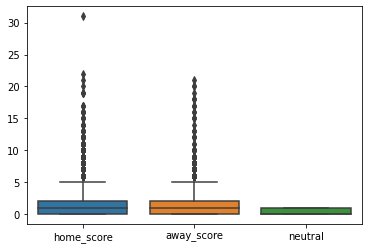

In [ ]:
# Checking for Outliers
sns.boxplot(data=results);            

In [ ]:
#Outliers in home and away scores may not be outliers
outlier_description = results[["home_score", "away_score"]]
outlier_description.describe()

#We retain them because of Australia's 31–0 victory during the 2002 FIFA World Cup qualification.

,home_score,away_score
count,23477.000000,23477.000000
mean,1.651020,1.100013
std,1.704306,1.349434
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


[Australia 31-0 Victory](https://en.wikipedia.org/wiki/List_of_players_with_the_most_goals_in_an_association_football_game#:~:text=The%20current%20world%20record%20for,2002%20FIFA%20World%20Cup%20qualification.)

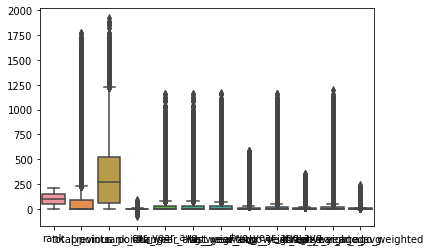

In [ ]:
sns.boxplot(data=fifa_ranking); 
#The dataset contains too many outliers which implies theyre probably not outliers so they'll remain

In [ ]:
# Checking for Anomalies
results['neutral'].unique()

array([False,  True])

In [ ]:
#Check number of unique values in results
results.nunique()

date          5608
home_team      298
away_team      294
home_score      23
away_score      22
tournament      76
city          1689
country        232
neutral          2
dtype: int64

In [ ]:
#Check number of unique values in fifa_ranking
fifa_ranking.nunique()

rank                         209
country_full                 216
country_abrv                 216
total_points               11114
previous_points             1557
rank_change                  121
cur_year_avg                7419
cur_year_avg_weighted       7419
last_year_avg               7473
last_year_avg_weighted      7001
two_year_ago_avg            7575
two_year_ago_weighted       6513
three_year_ago_avg          7628
three_year_ago_weighted     5849
confederation                  6
rank_date                    286
dtype: int64

In [ ]:
#checking for duplicates and dropping them

results.drop_duplicates(keep='first',inplace = True)
results['home_team'].drop_duplicates(keep='first',inplace = True)
print("results", results.shape)
fifa_ranking.drop_duplicates(subset = None, keep = 'first', inplace = True)
print("fifa_ranking", fifa_ranking.shape)

#rechecking number of unique values in home and away teams
print("home_team",results['home_team'].nunique())
print("away_team",results['away_team'].nunique())

results (23477, 9)
fifa_ranking (57756, 16)
home_team 298
away_team 294


In [ ]:
# converting the 'date' and 'rank_date' columns to datetime format 

#first standardising the dates
fifa_ranking.rank_date = fifa_ranking.rename({'rank_date': 'date'}, axis = 1, inplace = True)

#Standardising the dates
results.date = results.date.apply(lambda x: x.replace('/', '-'))
fifa_ranking.date = fifa_ranking.date.apply(lambda x: x.replace('/', '-'))



In [ ]:
#Changing date dtypes to datetime
results['date'] = pd.to_datetime(results['date'])
fifa_ranking['date'] = pd.to_datetime(fifa_ranking['date'])


In [ ]:
#Dropping city column in results
results = results.drop(columns = ['city'], axis = 1)
results.head(2)

,date,home_team,away_team,home_score,away_score,tournament,country,neutral
17362,1993-01-02,Gabon,Burkina Faso,1,1,Friendly,Gabon,False
17363,1993-01-02,Kuwait,Lebanon,2,0,Friendly,Kuwait,False


Joining/merging results and fifa_ranking dataframe

In [ ]:
#Renaming columns in fifa_ranking 

fifa_ranking = fifa_ranking.rename(columns = {'rank_date':'date'})
#fifa_ranking = fifa_ranking.rename(columns = {'country_full':'country'})

In [ ]:
#standardising the data

#lowering country names in both dataframes

results['country'] = results['country'].str.lower()
results['home_team'] = results['home_team'].str.lower()
results['away_team'] = results['away_team'].str.lower()
fifa_ranking['country_full'] = fifa_ranking['country_full'].str.lower()         

#### Feature Engineering

In [ ]:
#Splitting date to month and years

#fifa_ranking
fifa_ranking['year'] = fifa_ranking.date.dt.year
fifa_ranking['month'] = fifa_ranking.date.dt.month

#results
results['year'] = results.date.dt.year
results['month'] = results.date.dt.month

In [ ]:
fifa_ranking.head(2)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date,year,month
0,1,germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
1,2,italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8


In [ ]:
fifa = pd.merge(results, fifa_ranking, how = 'left', on = ['year', 'month'])

#fifa shape and null values    
print("Duplicates: ",fifa.duplicated().any()) 
fifa.isnull().sum()   

Duplicates:  False


date_x                        0
home_team                     0
away_team                     0
home_score                    0
away_score                    0
tournament                    0
country                       0
neutral                       0
year                          0
month                         0
rank                       2416
country_full               2416
country_abrv               2416
total_points               2416
previous_points            2416
rank_change                2416
cur_year_avg               2416
cur_year_avg_weighted      2416
last_year_avg              2416
last_year_avg_weighted     2416
two_year_ago_avg           2416
two_year_ago_weighted      2416
three_year_ago_avg         2416
three_year_ago_weighted    2416
confederation              2416
date_y                     2416
dtype: int64

In [ ]:
#Getting rank of home team
home_rank = fifa[fifa['home_team'] == fifa['country_full']]

#Getting rank of away team
away_rank = fifa[fifa['away_team'] == fifa['country_full']]

In [ ]:
#Selecting relevant columns and differentiating the columns for home_rank and away_rank
#away_rank
away_rank = away_rank[['date_x','country_full','home_team','away_team','home_score','away_score','tournament'
,'neutral','year','month','rank','total_points','cur_year_avg_weighted','last_year_avg_weighted','two_year_ago_weighted'
                       ,'three_year_ago_weighted']]

#renaming the home_rank columns
away_rank = away_rank.rename(columns = {'date_x':'date',
                            'rank':'rank_away',
                            'cur_year_avg_weighted':'cur_year_weighted_aw',
                            'last_year_avg_weighted':'last_year_weighted_aw',
                            'two_year_ago_weighted':'two_year_weighted_aw',
                            'three_year_ago_weighted':'three_year_weighted_aw',
                            'total_points':'total_points_aw'})

away_rank.drop(columns = ['country_full'], inplace=True)

away_rank.head(1)

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month,rank_away,total_points_aw,cur_year_weighted_aw,last_year_weighted_aw,two_year_weighted_aw,three_year_weighted_aw
614,1993-08-01,colombia,paraguay,0,0,FIFA World Cup qualification,False,1993,8,67.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#home_rank
home_rank = home_rank[['date_x','country_full','home_team','away_team','home_score','away_score','tournament'
,'neutral','year','month','rank','total_points','cur_year_avg_weighted','last_year_avg_weighted','two_year_ago_weighted'
                       ,'three_year_ago_weighted']]

#renaming the home_rank columns
home_rank = home_rank.rename(columns = {'date_x':'date',
                            'rank':'rank_home',
                            'cur_year_avg_weighted':'cur_year_weighted_hm',
                            'last_year_avg_weighted':'last_year_weighted_hm',
                            'two_year_ago_weighted':'two_year_weighted_hm',
                            'three_year_ago_weighted':'three_year_weighted_hm',
                            'total_points':'total_points_hm'})

In [ ]:
#Not dropping country_full in home_rank
home_rank.head(3)

,date,country_full,home_team,away_team,home_score,away_score,tournament,neutral,year,month,rank_home,total_points_hm,cur_year_weighted_hm,last_year_weighted_hm,two_year_weighted_hm,three_year_weighted_hm
566,1993-08-01,colombia,colombia,paraguay,0,0,FIFA World Cup qualification,False,1993,8,19.0,0.0,0.0,0.0,0.0,0.0
784,1993-08-01,peru,peru,argentina,0,1,FIFA World Cup qualification,False,1993,8,70.0,0.0,0.0,0.0,0.0,0.0
903,1993-08-01,uruguay,uruguay,ecuador,0,0,FIFA World Cup qualification,False,1993,8,22.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Merging the two dataframes using inner join to retain only rows in both datasets

fifa_rank = pd.merge(home_rank, away_rank, how = 'inner' , on =['year', 'month', 'home_team', 'away_team'])
fifa_rank.head()

,date_x,country_full,home_team,away_team,home_score_x,away_score_x,tournament_x,neutral_x,year,month,rank_home,total_points_hm,cur_year_weighted_hm,last_year_weighted_hm,two_year_weighted_hm,three_year_weighted_hm,date_y,home_score_y,away_score_y,tournament_y,neutral_y,rank_away,total_points_aw,cur_year_weighted_aw,last_year_weighted_aw,two_year_weighted_aw,three_year_weighted_aw
0,1993-08-01,colombia,colombia,paraguay,0,0,FIFA World Cup qualification,False,1993,8,19.0,0.0,0.0,0.0,0.0,0.0,1993-08-01,0,0,FIFA World Cup qualification,False,67.0,0.0,0.0,0.0,0.0,0.0
1,1993-08-01,peru,peru,argentina,0,1,FIFA World Cup qualification,False,1993,8,70.0,0.0,0.0,0.0,0.0,0.0,1993-08-01,0,1,FIFA World Cup qualification,False,5.0,0.0,0.0,0.0,0.0,0.0
2,1993-08-01,uruguay,uruguay,ecuador,0,0,FIFA World Cup qualification,False,1993,8,22.0,0.0,0.0,0.0,0.0,0.0,1993-08-01,0,0,FIFA World Cup qualification,False,35.0,0.0,0.0,0.0,0.0,0.0
3,1993-08-01,venezuela,venezuela,brazil,1,5,FIFA World Cup qualification,False,1993,8,94.0,0.0,0.0,0.0,0.0,0.0,1993-08-01,1,5,FIFA World Cup qualification,False,8.0,0.0,0.0,0.0,0.0,0.0
4,1993-08-07,senegal,senegal,zambia,0,0,FIFA World Cup qualification,True,1993,8,58.0,0.0,0.0,0.0,0.0,0.0,1993-08-07,0,0,FIFA World Cup qualification,True,25.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Dropping redundant columns
fifa_rank = fifa_rank.drop(columns=['home_score_y','away_score_y','tournament_y','neutral_y','date_y'])

In [ ]:
#checking for null values
fifa_rank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17632 entries, 0 to 17631
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date_x                  17632 non-null  datetime64[ns]
 1   country_full            17632 non-null  object        
 2   home_team               17632 non-null  object        
 3   away_team               17632 non-null  object        
 4   home_score_x            17632 non-null  int64         
 5   away_score_x            17632 non-null  int64         
 6   tournament_x            17632 non-null  object        
 7   neutral_x               17632 non-null  bool          
 8   year                    17632 non-null  int64         
 9   month                   17632 non-null  int64         
 10  rank_home               17632 non-null  float64       
 11  total_points_hm         17632 non-null  float64       
 12  cur_year_weighted_hm    17632 non-null  float6

In [ ]:
#Finding total goals scored by a team
fifa_rank['goals_scored'] = fifa_rank['home_score_x'] + fifa_rank['away_score_x']

In [ ]:
#Finding Goal Difference to determine if Win, Lose or Draw and assigning to new column goal

fifa_rank['goal_difference'] = fifa_rank['home_score_x'] - fifa_rank['away_score_x']

def outcome(goal_difference):
    if goal_difference > 0:
        return 'W'
    elif goal_difference < 0:
        return 'L'
    else:
        return 'D'

#Running the outcome function to new column outcome

fifa_rank['outcome'] = fifa_rank.goal_difference.apply(lambda x: outcome(x))
fifa_rank.head(4)

,date_x,country_full,home_team,away_team,home_score_x,away_score_x,tournament_x,neutral_x,year,month,rank_home,total_points_hm,cur_year_weighted_hm,last_year_weighted_hm,two_year_weighted_hm,three_year_weighted_hm,rank_away,total_points_aw,cur_year_weighted_aw,last_year_weighted_aw,two_year_weighted_aw,three_year_weighted_aw,goals_scored,goal_difference,outcome
0,1993-08-01,colombia,colombia,paraguay,0,0,FIFA World Cup qualification,False,1993,8,19.0,0.0,0.0,0.0,0.0,0.0,67.0,0.0,0.0,0.0,0.0,0.0,0,0,D
1,1993-08-01,peru,peru,argentina,0,1,FIFA World Cup qualification,False,1993,8,70.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1,-1,L
2,1993-08-01,uruguay,uruguay,ecuador,0,0,FIFA World Cup qualification,False,1993,8,22.0,0.0,0.0,0.0,0.0,0.0,35.0,0.0,0.0,0.0,0.0,0.0,0,0,D
3,1993-08-01,venezuela,venezuela,brazil,1,5,FIFA World Cup qualification,False,1993,8,94.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,6,-4,L


In [ ]:
fifa_rank.tail(3)

,date_x,country_full,home_team,away_team,home_score_x,away_score_x,tournament_x,neutral_x,year,month,rank_home,total_points_hm,cur_year_weighted_hm,last_year_weighted_hm,two_year_weighted_hm,three_year_weighted_hm,rank_away,total_points_aw,cur_year_weighted_aw,last_year_weighted_aw,two_year_weighted_aw,three_year_weighted_aw,goals_scored,goal_difference,outcome
17629,2018-06-28,england,england,belgium,0,1,FIFA World Cup,True,2018,6,12.0,1050.84,476.42,296.75,174.15,103.52,3.0,1298.32,629.98,322.82,158.94,186.58,1,-1,L
17630,2018-06-30,france,france,argentina,4,3,FIFA World Cup,True,2018,6,7.0,1198.13,520.12,428.38,118.09,131.54,5.0,1241.45,404.07,404.80,248.99,183.59,7,1,W
17631,2018-06-30,uruguay,uruguay,portugal,2,1,FIFA World Cup,True,2018,6,14.0,1018.41,486.28,243.84,168.44,119.85,4.0,1273.69,646.92,345.91,155.33,125.53,3,1,W


## 6. Exploratory Analysis

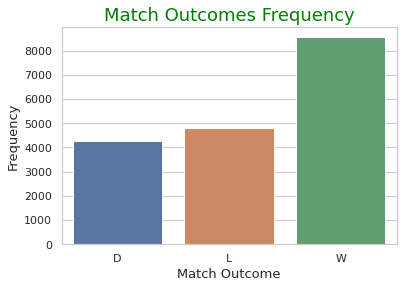

In [ ]:
# Ploting the univariate summaries and recording our observations
#Using seaborns countplot to visualise game outcomes, we find that there are more wins than draws and losses

sns.set(style="whitegrid")
sns.countplot(fifa_rank['outcome'],data = fifa_rank)
plt.xlabel("Match Outcome",fontsize=13)
plt.ylabel("Frequency",fontsize=13)
plt.title("Match Outcomes Frequency",fontsize=18,color="green")
plt.show()

In [ ]:
#Grouping categorical columns into three categories using label encoder

le = LabelEncoder() 

fifa_rank['outcome']= le.fit_transform(fifa_rank['outcome'])  # Ordered by 'D':0,'L':1,'W':2

#Function for Categorising tournament_x

def tournament_cat(tournament_x):
    if (tournament_x == 'FIFA World Cup qualification') or (tournament_x == 'FIFA World Cup'):
        return 'World_Cup'
    if tournament_x == 'Friendly':
        return 'Friendly'
    else:
        return 'Other'

# Categorising tournament_x

fifa_rank['tournament_x'] = fifa_rank['tournament_x'].apply(lambda x: tournament_cat(x))

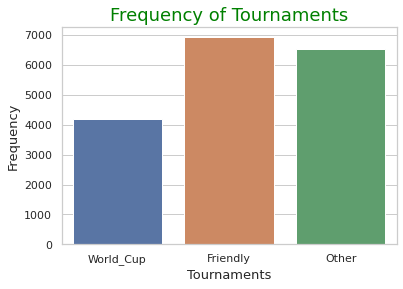

In [ ]:
sns.countplot(fifa_rank['tournament_x'],data = fifa_rank)
plt.xlabel("Tournaments",fontsize=13)
plt.ylabel("Frequency",fontsize=13)
plt.title("Frequency of Tournaments",fontsize=18,color="green")
plt.show()

#Frendlies are the most played tournaments

Text(0.5, 1.0, 'Monthly Seasonality for Games Played Annually')

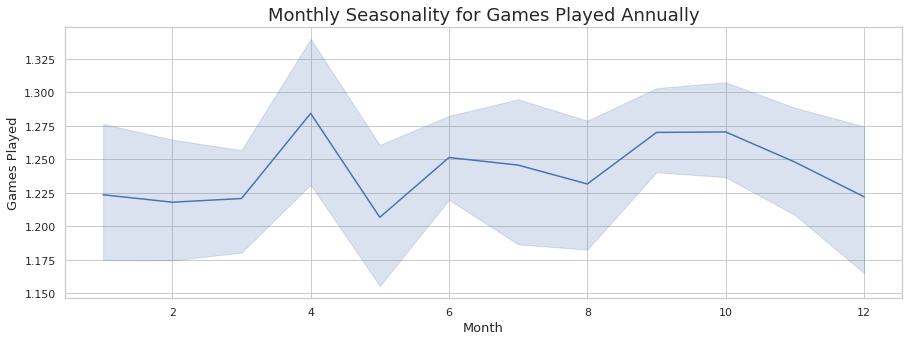

In [ ]:
#Checking for Seasonality of games played by Month and Year
plt.figure(figsize=(15,5))
sns.lineplot(data=fifa_rank, x='month', y='outcome');
plt.xlabel("Month", fontsize=13)
plt.ylabel("Games Played", fontsize=13)
plt.title("Monthly Seasonality for Games Played Annually", fontsize=18)

#Number of games played is highest in April

Text(0.5, 1.0, 'Seasonality for Tournaments Played Yearly')

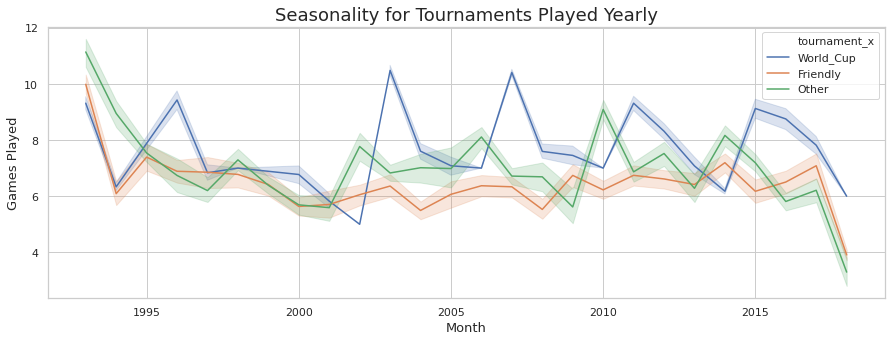

In [ ]:
#Checking for Seasonality of tournaments by Year

plt.figure(figsize=(15,5))
sns.lineplot(x="year", y="month", hue="tournament_x", data=fifa_rank);
plt.xlabel("Month", fontsize=13)
plt.ylabel("Games Played", fontsize=13)
plt.title("Seasonality for Tournaments Played Yearly", fontsize=18)

#Number of total teams and games played in world cup tournaments increased between 2002 and 2008 roughly 
#and its the most dominant tournament

In [ ]:
#Checking for Seasonality of Outcomes by Year

win = fifa_rank
win['outcome']= le.fit_transform(win['outcome']) # Ordered Win:2, Lose:1, Draw:0

Text(0.5, 1.0, 'Seasonality for Outcomes Yearly')

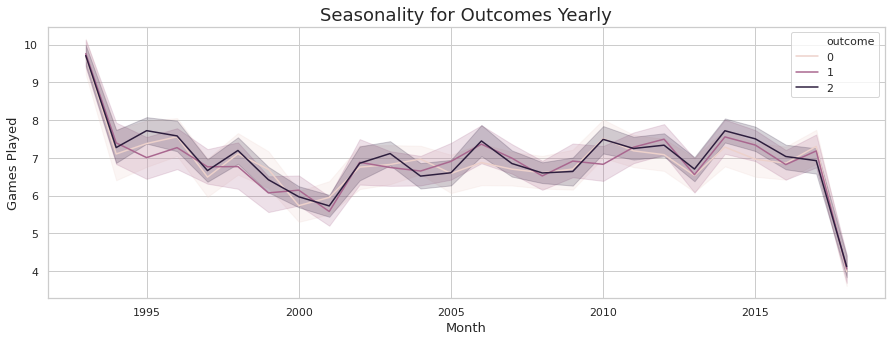

In [ ]:
plt.figure(figsize=(15,5))

sns.lineplot(x="year", y="month", hue= 'outcome', data=fifa_rank);
plt.xlabel("Month", fontsize=13)
plt.ylabel("Games Played", fontsize=13)
plt.title("Seasonality for Outcomes Yearly", fontsize=18)

#The winnings have been increasing slowly over the years (Dark Purple(2)) 
#meaning that goal differences between teams has reduced

In [ ]:
fifa_rank.describe()

,home_score_x,away_score_x,tournament_x,neutral_x,year,month,rank_home,total_points_hm,cur_year_weighted_hm,last_year_weighted_hm,two_year_weighted_hm,three_year_weighted_hm,rank_away,total_points_aw,cur_year_weighted_aw,last_year_weighted_aw,two_year_weighted_aw,three_year_weighted_aw,goals_scored,goal_difference,outcome
count,17632.000000,17632.000000,17632.000000,17632.000000,17632.000000,17632.000000,17632.000000,17632.000000,17632.000000,17632.000000,17632.000000,17632.000000,17632.000000,17632.000000,17632.000000,17632.000000,17632.000000,17632.000000,17632.000000,17632.000000,17632.000000
mean,1.607078,1.060628,0.844374,0.232475,2006.367287,6.853675,76.895985,161.125915,81.663881,40.301297,23.193962,15.967020,80.069079,154.458752,77.984171,38.755138,22.513456,15.206239,2.667706,0.546450,1.244158
std,1.614934,1.235297,0.777825,0.422422,6.806711,3.287506,50.794666,309.811354,162.743330,82.533563,47.568487,32.683341,52.299603,299.189117,157.037759,79.335665,46.842160,31.289771,1.868396,2.185644,0.816563
min,0.000000,0.000000,0.000000,0.000000,1993.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,2001.000000,4.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,1.000000
50%,1.000000,1.000000,1.000000,0.000000,2007.000000,7.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000
75%,2.000000,2.000000,1.000000,0.000000,2012.000000,10.000000,112.000000,212.532500,95.662500,43.395000,22.190000,16.270000,117.000000,193.635000,85.000000,40.260000,20.210000,14.822500,4.000000,2.000000,2.000000
max,31.000000,15.000000,2.000000,1.000000,2018.000000,12.000000,209.000000,1770.060000,1158.660000,584.790000,345.940000,240.150000,209.000000,1770.060000,1126.040000,584.790000,347.910000,240.150000,31.000000,31.000000,2.000000


## 7. Implementing the Solution

#### Check of multicollinearity

In [ ]:
#Encoding neutral and tournament columns

#Applying label encoder on tournament_x
fifa_rank['tournament_x']= le.fit_transform(fifa_rank['tournament_x'])
fifa_rank['neutral_x']= le.fit_transform(fifa_rank['neutral_x'])


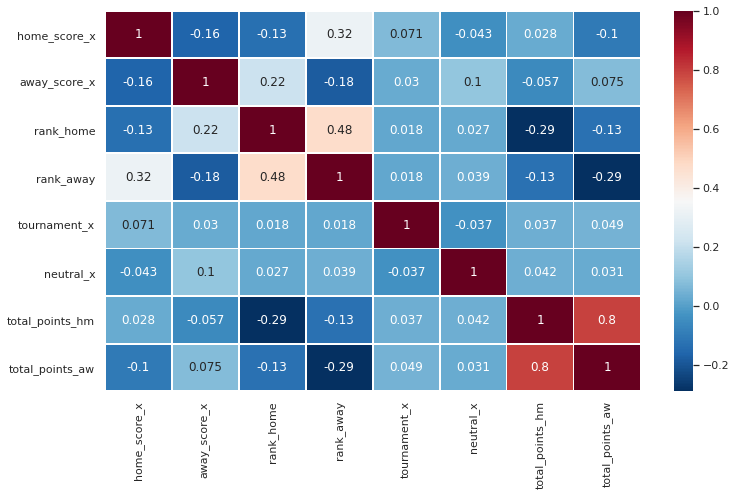

In [ ]:
#Displaying Correlations

fifa_rank_ = fifa_rank[['home_score_x','away_score_x','rank_home','rank_away','tournament_x','neutral_x','total_points_hm','total_points_aw']]

fifa_rank_corr = fifa_rank_.corr(method='pearson')

plt.figure(figsize = (12,7)) 

#Displaying heatmap 
sns.heatmap(fifa_rank_corr, 
            xticklabels=fifa_rank_corr.columns,
            yticklabels=fifa_rank_corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.8)

In [ ]:
##Displaying inverse of Correlations which gives the Variance Inflation Factor

vif_factor = pd.DataFrame(np.linalg.inv(fifa_rank_corr.values), index = fifa_rank_corr.index, columns = fifa_rank_corr.columns)
vif_factor
#
#Interpreting VIF Factors
#1 = not correlated.
#1 & 5 = moderately correlated.
#> 5 = highly correlated.

,home_score_x,away_score_x,rank_home,rank_away,tournament_x,neutral_x,total_points_hm,total_points_aw
home_score_x,1.267928,-0.015176,0.483596,-0.635872,-0.084755,0.063514,0.043648,-0.023336
away_score_x,-0.015176,1.195388,-0.460645,0.439125,-0.038424,-0.125725,0.030893,-0.042318
rank_home,0.483596,-0.460645,1.992023,-1.313899,-0.026739,0.046061,1.114327,-0.928868
rank_away,-0.635872,0.439125,-1.313899,2.109802,-0.006015,-0.112780,-0.951033,1.104650
tournament_x,-0.084755,-0.038424,-0.026739,-0.006015,1.012376,0.040754,0.005094,-0.066317
neutral_x,0.063514,-0.125725,0.046061,-0.112780,0.040754,1.022147,-0.050291,-0.004701
total_points_hm,0.043648,0.030893,1.114327,-0.951033,0.005094,-0.050291,3.607103,-3.006921
total_points_aw,-0.023336,-0.042318,-0.928868,1.104650,-0.066317,-0.004701,-3.006921,3.603574


The above Variance Inflation Factors are very close to 1 and definitely less than 5. This means that theres no multicollinearity or its very negligible.

#### Polynomial Model

###### Model 1 : Predicting how many goals the home team scores

In [ ]:
fifa_rank1 = fifa_rank[['home_team','away_team','home_score_x','away_score_x','rank_home','rank_away','tournament_x','neutral_x','total_points_hm','total_points_aw']]
fifa_rank1.head(2)

,home_team,away_team,home_score_x,away_score_x,rank_home,rank_away,tournament_x,neutral_x,total_points_hm,total_points_aw
0,colombia,paraguay,0,0,19.0,67.0,2,0,0.0,0.0
1,peru,argentina,0,1,70.0,5.0,2,0,0.0,0.0


In [ ]:
#Importing necessary libraries for modelling

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
import scipy as sc
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

#Get all columns except home_score_x
X = fifa_rank[['home_team','away_team','away_score_x','rank_home','rank_away','tournament_x','neutral_x']]
y = y = fifa_rank['home_score_x'].values

#Encoding features
X = pd.get_dummies(X, drop_first=True)


In [ ]:
#Splitting the dataset and using 80% for training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Scaling our data because total points has large figures
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Fitting polynomial features
#Using more than 1 degree crashes the notebook for this dataset

poly = PolynomialFeatures(degree = 1)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)

In [ ]:
# Training our model

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Predictions and Accuracy

# Making predictions

y_pred = regressor.predict(X_test)

# Measuring the accuracy of the model using RMSE

print(np.sqrt(mean_squared_error(y_test, y_pred)))

1.2880259357653916


Generally, we should aim to get a lower RMSE score to be more accurate.Since mean of home score is 1.6, we should aim to get less than 10% of 1.6 for the model to perfom more accurately.

###### Creating residual plots 
and assessing Heteroskedasticity

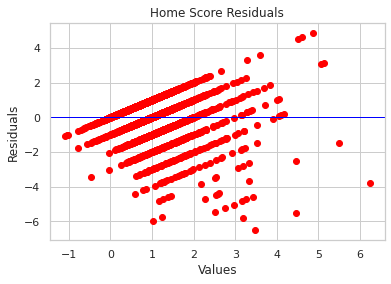

In [ ]:
#Getting residuals
res = np.subtract(y_pred, y_test)

# Plotting residuals

plt.scatter(y_pred, res, color='red')
plt.title('Home Score Residuals')
plt.ylabel('Residuals')
plt.xlabel('Values')
plt.axhline(y= res.mean(), color='blue', linewidth=1)
plt.show()

The residuals are not centred around the mean/normally distributed indicating the model is not accurate

In [ ]:
# Assessing Heteroskedasticity using barlett's test

test_result, p_value = sc.stats.bartlett(y_pred, res)

print("P-Value is ;",p_value )

P-Value is ; 4.3046925963184294e-67


The p value is less than 0.05 indicating the variances are not equal and the model is performing poorly.

###### Model 2 : Predicting how many goals the away team scores

In [ ]:
#Get all columns except away_score_x
X = fifa_rank[['home_team','away_team','home_score_x','rank_home','rank_away','tournament_x','neutral_x']]
y = y = fifa_rank['away_score_x'].values

#Encoding features
X = pd.get_dummies(X, drop_first=True)

#Splitting the dataset and using 80% for training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Scaling our data because total points has large figures
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Fitting polynomial features
#Using more than 1 degree crashes the notebook for this dataset

poly = PolynomialFeatures(degree = 1)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)

In [ ]:
# Training our model

regressor = LinearRegression()
regressor.fit(X_train, y_train)

#Predictions and Accuracy

# Making predictions

y_pred = regressor.predict(X_test)

# Measuring the accuracy of the model using RMSE

print(np.sqrt(mean_squared_error(y_test, y_pred)))

1.0968689893037051


This RMSE is slightly lower than the previous model but still performing poorly since mean of away score is 1.06, we should aim to get less than 10% of 1.06 for the model to perfom more accurately.

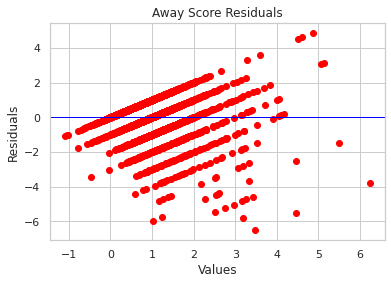

In [ ]:
#Plotting residuals

res = y_pred - y_test

# Plotting residuals

plt.scatter(y_pred, res, color='red')
plt.title('Away Score Residuals')
plt.ylabel('Residuals')
plt.xlabel('Values')
plt.axhline(y= res.mean(), color='blue', linewidth=1)
plt.show()

These residuals are also not centred around the mean/normally distributed indicating the model is not accurate

#### Logistic Regression

In [ ]:
#Get all columns except outcome 
X = fifa_rank[['home_team','away_team','away_score_x','home_score_x','rank_home','rank_away','tournament_x','neutral_x',]]
y = y = fifa_rank['outcome'].values

#Encoding features
X = pd.get_dummies(X, drop_first=True)

#Splitting the data and using 80% as training set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

#Model fitting
regression = LogisticRegression()
regression.fit(X_train,y_train)

#Predicting the outcome

y_pred = regression.predict(X_test)

#Getting Model Accuracy

print("The Model's Accuracy is : ", accuracy_score(y_test, y_pred))

The Model's Accuracy is :  1.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression performs better though the accuracy score is too high at 100% which indicates overfitting. This means the model cannot be applied to different datasets accurately. 

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but we never allow those results to hold the day. 

>We look for alternative models that suite this data better






Challenging the solution using different hyperparameters using Random Search and a classifier with different classification models.

In [ ]:
#Hyperparameter tuning using Random search

#Specifying our hyperparameters

param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

#Instantiating classifier to store classification models
classifier = []

#Appending different classification models to our classifier
classifier.append(('Logistic Regression ', LogisticRegression(solver='liblinear', multi_class='ovr')))
classifier.append(('Random Forest ', RandomForestClassifier()))
classifier.append(('GussianNB ', GaussianNB()))
classifier.append(('Decision Tree ', DecisionTreeClassifier()))

random_search = RandomizedSearchCV(classifier, param_dist, cv = 5) 

In [ ]:
# Implementing cross valiadtaion using KFold

m_results =[]
names = []

for name, model in classifier:
   kfold = KFold(n_splits=5, random_state=0)
   model_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
   m_results.append(model_results)
   names.append(name)
   print("%s: %f (%f)" % (name, model_results.mean(), model_results.std()))


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Logistic Regression : 0.999716 (0.000265)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Random Forest : 0.995675 (0.000757)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


GussianNB : 0.421269 (0.013863)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Decision Tree : 0.999575 (0.000142)


From the results we can see that Logistic Regression, Random Forest and Decision Tree Classifier have the best accuracies.

## 9. Follow up questions

### a). Did we have the right data?

Yes, the data was right

### b). Do we need other data to answer our question?

Yes, if is possible to obtain ranking records from before 1993-08-08, the model will have better performance.

### c). Did we have the right question?


In conclusion, the questions were right for the dataset and the best models for this kind of prediction are but not limited to Logistic Regression, Random Forest and Desicion Tree Classifier since they had an Accuracy Score of 0.99.